### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [1]:
#Import Libraries

import sys
sys.path.append('/Assignment2/src')
import os
import numpy as np
from src import *
from math_utils import *

KeyboardInterrupt: 

### Establish nodes (x, y, z)
Establish elements to establish connectivity in the structure ([node1, node2, E, nu, A, Iz, Iy, Ip, J, z_axis])

Establish support conditions, 
    1 = free DOF, 
    0 = constrained  
    (Node index, x, y, z, z, y, p)

Establish applied forces, must establish for each node (Fx, Fy, Fz, Mx, My, Mz)

In [2]:
#Define each node using the following template
#NodeX = [X, Y, Z]
node0 = [0, 0, 0]  
node1 = [25*(1/6), 50*(1/6), 37*(1/6)] 
node2 = [25*(2/6), 50*(2/6), 37*(2/6)]  
node3 = [25*(3/6), 50*(3/6), 37*(3/6)]  
node4 = [25*(4/6), 50*(4/6), 37*(4/6)]  
node5 = [25*(5/6), 50*(5/6), 37*(5/6)]  
node6 = [25*(6/6), 50*(6/6), 37*(6/6)]  

nodes = np.array([node0, node1, node2, node3, node4, node5, node6])

r = 1
pi = np.pi
#Define element using the following template
#ElementX = ([nodeX1, nodeX2, E, nu, A, Iz, Iy, Ip, J, z_axis])
element1 = [0, 1, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]
element2 = [1, 2, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]
element3 = [2, 3, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]
element4 = [3, 4, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]
element5 = [4, 5, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]
element6 = [5, 6, 10000, 0.3, pi*r**2, (pi*r**4)/4, (pi*r**4)/4, (pi*r**4)/2, (pi*r**4)/2, [0,0,1]]


elements = np.array([element1, element2, element3, element4, element5, element6], dtype=object)

# Assign support constraints for each node as delineated below, as either fixed, free, or pinned. 
# 0 = free DOF, 1 = constrained DOF
support_0 = [0, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 1, 1, 1] Fixed Node
support_1 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_2 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_3 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_4 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_5 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node
support_6 = [1, 0, 0, 0, 0, 0, 0]  # [node_id, 0, 0, 0, 0, 0, 0] Free Node

#support_2 = [2, 1, 1, 1, 1, 1, 1]  # [node_id, 1, 1, 1, 0, 0, 0] Pinned Node

supports = np.array([support_0, support_1,support_2,support_3,support_4,support_5,support_6])

force_applied = np.array([[  0,   0,    0,   0,   0,   0],
                           [0,0,0,0,0,0],
                           [0,0,0,0,0,0],
                           [0,0,0,0,0,0],
                           [0,0,0,0,0,0],
                           [0,0,0,0,0,0],
                            [  0.05,   -0.1,    0.23,   0.1,   -0.025,   -0.08]])




### Compute Displacements and Forces, reformat for easier use

In [3]:
displacement, forces = structure(nodes, elements, force_applied, supports)
size = displacement.shape
n = size[0]/6
n = int(n)
reshape = np.reshape(displacement, (n, 6))
x_disp = reshape[:,0]
y_disp = reshape[:,1]
z_disp = reshape[:,2]
shape_force = forces.shape
n1 = shape_force[0]/6
n1 = int(n1)
reshape_forces = np.reshape(forces, (n,6))




### Results


In [4]:
print ('displacements=', reshape)
print ('forces = ', reshape_forces)

displacements= [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.01220833 -0.07761955  0.09668817  0.01995942 -0.00512939 -0.00663995]
 [ 0.04602994 -0.29240702  0.36413482  0.03631498 -0.00933411 -0.01209443]
 [ 0.09728798 -0.61719912  0.768455    0.04906668 -0.01261415 -0.01636342]
 [ 0.16180561 -1.02483253  1.27576373  0.05821453 -0.01496952 -0.01944693]
 [ 0.23540599 -1.48814399  1.85217606  0.06375851 -0.01640022 -0.02134497]
 [ 0.31391228 -1.97997018  2.46380701  0.06569864 -0.01690624 -0.02205752]]
forces =  [[-5.00000000e-02  1.00000000e-01 -2.30000000e-01 -1.53000000e+01
   3.92500000e+00  5.08000000e+00]
 [-8.52651283e-14 -2.84217094e-14  2.84217094e-14  1.42108547e-14
  -3.55271368e-15 -3.55271368e-15]
 [ 1.13686838e-13 -1.13686838e-13  1.13686838e-13 -2.84217094e-14
   1.42108547e-14 -1.42108547e-14]
 [ 2.27373675e-13  4.54747351e-13 -2.27373675e-13  0.00000000e+00
  -1.20792265e-13 -1.42108547e-14]
 [ 0.00000000e+00 -4.54747351e-13 -4.54747351

### Elastic *Could not get this section to work*

In [9]:
Nodes = [node(nodes[i][0], nodes[i][1], nodes[i][2], force_applied[i]) for i in range(len(nodes))]
for support in supports:
    node_index = support[0]
    Nodes[node_index].set_support(support[1:])

Elements = [element(Nodes[elements[i][0]], Nodes[elements[i][1]], elements[i][2], 
            elements[i][3], elements[i][4], elements[i][5], elements[i][6], 
            elements[i][7], elements[i][8], elements[i][9]) for i in range(len(elements))]
critical_loads, eigvalues, eigvectors = elastic_critical_load_analysis(Elements, displacement)

print ('Critical Loads=', critical_loads)
print ('eigvals', eigvalues)
print ('eig vectors', eigvectors)

Critical Loads= [inf+0.j inf+0.j inf+0.j inf+0.j inf+0.j inf+0.j inf+0.j inf+0.j inf+0.j
 inf+0.j inf+0.j inf+0.j]
eigvals [[ 0.70710678  0.70710678  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -1.          0.          0.          0.          0.          0.        ]
 [ 0.70710678 -0.70710678  0.  

[ 0.          4.16666667  8.33333333 12.5        16.66666667 20.83333333
 25.        ]


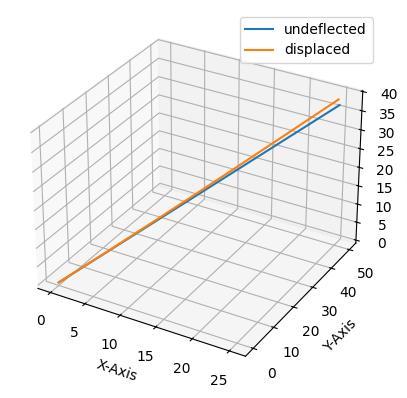

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x = nodes [:,0]
x_1 = nodes [:,0] + x_disp
y = nodes [:,1]
y_1 = nodes [:,1] + y_disp
z = nodes [:,2]
z_1 = nodes [:,2] + z_disp
print (x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot (x,y,z, label = 'undeflected')
ax.plot (x_1, y_1, z_1, label='displaced')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')
plt.legend()
plt.show()

In [ ]:
#FOR SOLVING:

#scipy.linalg.eig (Keff, -Kgff)

#(Keff + eig*Kgff)v = 0